# Importe

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import statsmodels.api as sm
from uncertainties import ufloat, unumpy as unp
import uncertainties
from uncertainties.unumpy import (nominal_values as n,std_devs as s)
import scipy.stats as stats
# import tikzplotlib

plt.style.use('classic')
plt.rc('text',usetex=True)
plt.rc('axes', labelsize = 15) # Schriftgröße der x- und y-Beschriftungen

# Eigene Funktionen

In [ ]:
def reg1(x,a,b):
    f = a/x +b
    return f
def reg2(x,a,b):
    f = a * x+b
    return f

def reg3(x,a,b,c):
    f = a* np.exp(b*x)+c
    return f

# Daten laden

In [ ]:
# Kapazität
C = 10e-3

# Fehler
u_U1 = 2e-3 # mV
u_U2_Ew_ohne = 0.05  # V
u_U2 = 0.1

In [6]:
Ew_o = pd.read_csv('Einweg_ohne.txt',sep='\t')
print(Ew_o.head())
Ew_m = pd.read_csv('Einweg_mit.txt',sep='\t')
# print(Ew_m.head())
Zw_o = pd.read_csv('Zweiweg_ohne.txt',sep='\t')
# print(Zw_o.head())
Zw_m = pd.read_csv('Zweiweg_mit.txt',sep='\t')
# print(Zw_m.head())

      I  U1    U2    R
0  54.3  36  0.60   11
1  19.0  39  2.10  111
2  11.5  39  2.40  211
3   8.3  39  2.57  311
4   6.5  39  2.66  411


In [7]:
# Fehlerrechnung Dekadenwiderstand: 0.02 Ohm + 0.003 * Messwert
u_R1 = np.ones(10) # für Ew_m
u_R2 = np.ones(10) # sonst
u_r = np.sqrt((0.02+ 0.0003*1)**2+(0.02+ 0.003*10)**2)

for i in range(10):
    u_R2[i] = np.sqrt((0.02+ 0.0003*100*i)**2 + u_r**2)
    if i ==0:
        u_R1[i] = np.sqrt((0.02+ 0.0003*100*i)**2 + (0.02+ 0.0003*1)**2)
    else:
        u_R1[i] = np.sqrt((0.02+ 0.0003*100*i)**2 + u_r**2)

# Datenanalyse

In [8]:
# Strom
I_Ew_o = Ew_o['I']
I_Ew_m = Ew_m['I']
I_Zw_o = Zw_o['I']
I_Zw_m = Zw_m['I']

# Spannung
U_Ew_o = Ew_o['U2']
U_Ew_m = Ew_m['U2']
U_Zw_o = Zw_o['U2']
U_Zw_m = Zw_m['U2']

## Visualisierung

In [9]:
print(len(I_Ew_o))
print(len(U_Ew_o))

10
10


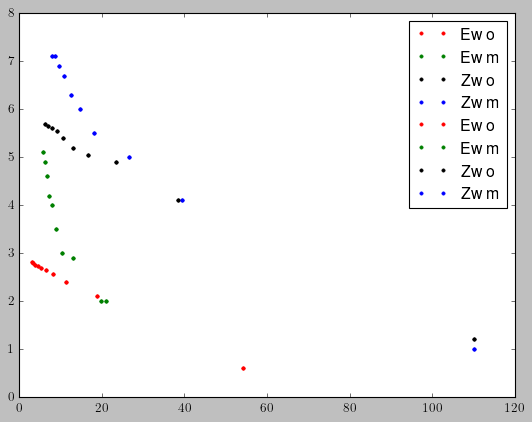

In [11]:
plt.plot(I_Ew_o,U_Ew_o,'r.',label='Ew o')
plt.plot(I_Ew_m,U_Ew_m,'g.',label='Ew m')
plt.plot(I_Zw_o,U_Zw_o,'k.',label='Zw o')
plt.plot(I_Zw_m,U_Zw_m,'b.',label='Zw m')
plt.legend()
plt.show()

## Regression

### mit scipy

In [12]:
# a/x verhältnis
pop, cov = curve_fit(reg2,I_Ew_o,U_Ew_o,sigma = np.ones(10)*u_U2_Ew_ohne)
a1, b1 = pop
da1, db1 = np.sqrt(np.diag(cov))
a1_err = ufloat(a1,da1)
b1_err = ufloat(b1,db1)
print('a1 und b1')
print(ufloat(a1,da1))
print(ufloat(b1,db1),'\n')

pop, cov = curve_fit(reg2,I_Zw_o,U_Zw_o,sigma = np.ones(10)*u_U2)
a2, b2 = pop
da2, db2 = np.sqrt(np.diag(cov))

# a * x verhältnis
pop, cov = curve_fit(reg1,I_Ew_m,U_Ew_m,sigma = np.ones(10)*u_U2)
a3, b3 = pop
da3, db3 = np.sqrt(np.diag(cov))

pop, cov = curve_fit(reg1,I_Zw_m,U_Zw_m,sigma = np.ones(10)*u_U2)
a4, b4 = pop
da4, db4 = np.sqrt(np.diag(cov))

a2_err = ufloat(a2,da2)
b2_err = ufloat(b2,db2)
print('a2 und b2')
print(a2_err)
print(b2_err,'\n')
a3_err = ufloat(a3,da3)
b3_err = ufloat(b3,db3)
print('a3 und b3')
print(a3_err)
print(b3_err,'\n')
a4_err = ufloat(a4,da4)
b4_err = ufloat(b4,db4)
print('a4 und b4')
print(a4_err)
print(b4_err,'\n')

a1 und b1
-0.04307+/-0.00034
2.930+/-0.006 

a2 und b2
-0.0429+/-0.0009
5.88+/-0.04 

a3 und b3
25.0+/-0.9
0.80+/-0.11 

a4 und b4
43+/-8
2.5+/-0.6 



In [13]:
pop, cov = curve_fit(reg3,I_Ew_m,U_Ew_m,sigma = np.ones(10)*u_U2,maxfev=5000)
a33, b33,c3  = pop
da33, db33,dc3  = np.sqrt(np.diag(cov))

pop, cov = curve_fit(reg3,I_Zw_m,U_Zw_m,sigma = np.ones(10)*u_U2,maxfev=5000)
a44, b44 ,c4 = pop
da44, db44,c4  = np.sqrt(np.diag(cov))

In [14]:
print(c3)

10023.006414979489


### mit statsmodel

## Plot

In [15]:
x = np.arange(1, 120, 1)
xx = np.arange(5,120,1)
y1 = reg2(np.arange(2,60,1), a1, b1)
y2 = reg2(x,a2,b2)
y3 = reg1(x,a3,b3)
yy3 = reg1(np.arange(5,25,1),a3,b3)
y4 = reg1(x,a4,b4)
yy4 = reg1(xx,a4,b4)
I = r'$\textbf{I}$'
A = 'A'
V = 'V'
v_a = r'V/A'

In [16]:
print(f'Ewo: y_error={u_U2_Ew_ohne}\n')
print(f'Ewm: y_error={u_U2}\n')
print(f'Zwo: y_error={u_U2}\n')
print(f'Zwm: y_error={u_U2}\n')

Ewo: y_error=0.05

Ewm: y_error=0.1

Zwo: y_error=0.1

Zwm: y_error=0.1



In [17]:
u_U2_Ew_ohne

0.05

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\benjf\AppData\Local\Temp\ipykernel_30832\3382790647.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.errorbar(I_Zw_m,U_Zw_m,fmt='b.',yerr=u_U2,label='Zweiweg mit $C=10\mu$F, (Zwm)')


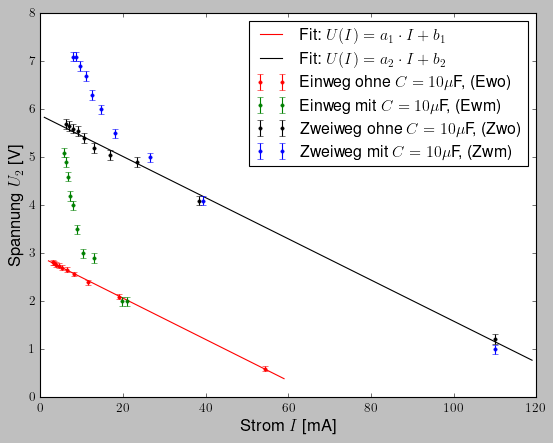

In [21]:
plt.errorbar(I_Ew_o,U_Ew_o,fmt='r.',yerr=u_U2_Ew_ohne,label=r'Einweg ohne $C=10\mu$F, (Ewo)')
plt.plot(np.arange(2,60,1),y1,'r',
         label=r'Fit: $U(I) = a_1 \cdot I+b_1$')
plt.errorbar(I_Ew_m,U_Ew_m,fmt='g.',yerr=u_U2,label=r'Einweg mit $C=10\mu$F, (Ewm)')
# plt.plot(np.arange(5,25,1),yy3,'g',
#         label=r'Fit: $U(I) =   \frac{a_3 }{I}+b_3$')
# plt.plot(np.arange(5,25,1),reg3(np.arange(5,25,1),a33,b33,c3))
plt.errorbar(I_Zw_o,U_Zw_o,fmt='k.',yerr=u_U2,label=r'Zweiweg ohne $C=10\mu$F, (Zwo)')
plt.plot(x,y2,'k',
         label=r'Fit: $U(I) =a_2  \cdot I +b_2$')
plt.errorbar(I_Zw_m,U_Zw_m,fmt='b.',yerr=u_U2,label='Zweiweg mit $C=10\mu$F, (Zwm)')
# plt.plot(xx,yy4,'b',
#         label=r'Fit: $U(I) =  \frac{a_4}{I}+b_4$')
#plt.plot(xx,reg3(xx,a44,b4,c4))
plt.legend()
plt.xlabel(r'Strom $I$ [mA]')
plt.ylabel(r'Spannung $U_2$ [V]')
# plt.savefig('A5-checkliste-E5.pdf',dpi=600)
# tikzplotlib.save('A5-Tex.tex')
plt.show()

In [22]:
# Kurzschlussstrom
# print(a1)
I_0_EWo = b1/a1
u_I_0_EW0 =  np.sqrt(db1**2 / a1**2+ da1**2* b1**2/ a1**4)
print('Kurzschlussstrom EW \n', ufloat(I_0_EWo, u_I_0_EW0))
I_0_Zwo = b2 / a2
u_I_0_Zwo = np.sqrt(db2**2 / a2**2+ da2**2* b2**2/ a2**4)
print('Kurzschlussstrom ZW \n', ufloat(I_0_Zwo, u_I_0_Zwo))

Kurzschlussstrom EW 
 -68.0+/-0.6
Kurzschlussstrom ZW 
 -137.0+/-3.2
